In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import datetime

def dateTime2String(dateTime):
    return dateTime.strftime("%d/%m/%Y")


data = pd.read_excel('tabla datos2.xlsx')

fechas = data["Etiquetas de fila"]
valores = data[" Suma de Valor transaccion "]

#Filtrar data de fechas y convertirlo a cadena
#FechasStr = list(map(dateTime2String, fechas))

#type(FechasStr)



#regression_model.fit(FechasStr, valores)

#coeficientes = regression_model.coef_
#intercepto = regression_model.intercept_


#data

(1006, 7)


C:\Users\JONATHAN GONZALEZ\AppData\Local\Temp\ipykernel_2220\3812559850.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(["Fecha"],1).hist()


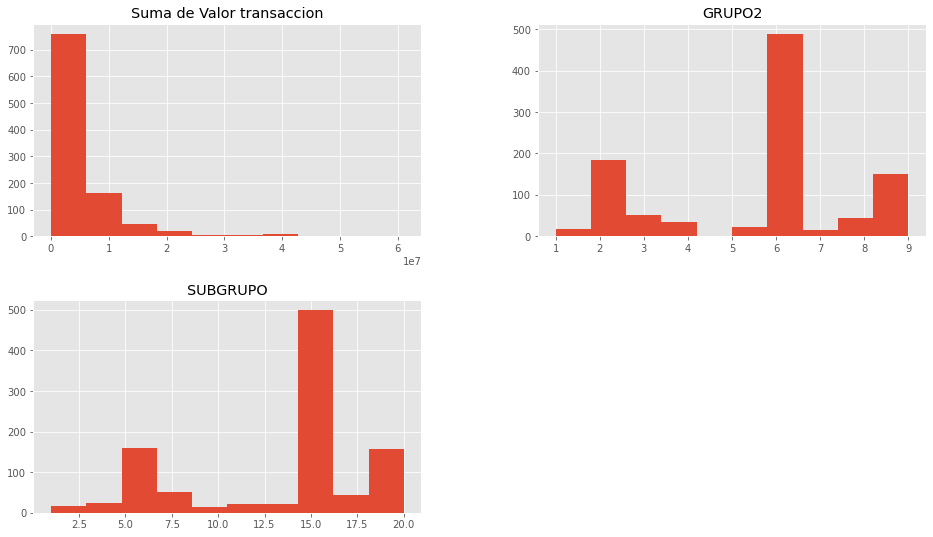

,Fecha,Suma de Valor transaccion,GRUPO,SUB GRUPO,NAL/INTERNAL,GRUPO2,SUBGRUPO
0,01/01/2018,10000,Evento festivo,dias de descanso,Nacional,3,7
1,15/01/2018,100000,Evento Siniestro,Afectacion directa,Nacional,4,9
2,19/01/2018,120000,Evento economico,Comercio internacional,Internacional,6,15
3,26/01/2018,150000,Evento politico,Internacional,Internacional,2,5
4,31/01/2018,60000,Evento economico,Comercio internacional,Internacional,6,15
...,...,...,...,...,...,...,...
1001,27/12/2021,6286000,Evento deportivo,Alto impacto,Nacional,1,1
1002,28/12/2021,7785846,Evento politico,Internacional,Internacional,2,5
1003,29/12/2021,14767000,Evento politico,Consultas y decisiones,Nacional,2,6
1004,30/12/2021,12700000,Evento de salud publica,Pandemia Covid - 19,Nacional,9,20


In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score



#cargamos los datos de entrada
data = pd.read_csv("tabla datos2.csv")
#veamos cuantas dimensiones y registros contiene
print(data.shape)

# Ahora veamos algunas estadísticas de nuestros datos
#print(data.describe())

#print(data)

#Visualizamos rápidamente las caraterísticas de entrada
data.drop(["Fecha"],1).hist()
plt.show()

data

En estas gráficas vemos entre qué valores se concentran la mayoría de registros. osea la sumatoria del total de los registros

Vamos a filtrar los datos por subgrupos en este caso por el **subgrupo 1** y **nacional**

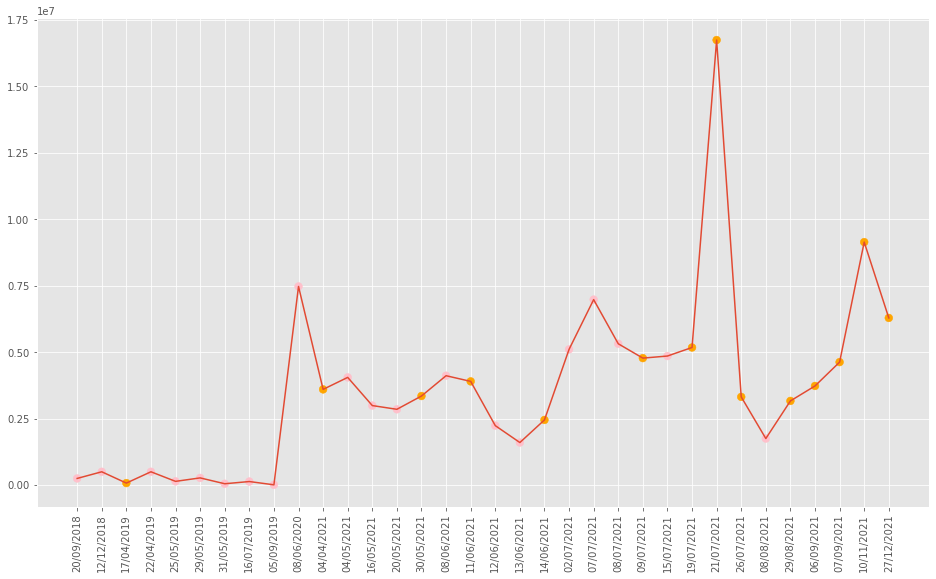

In [10]:
#Realizar un filtro
data_filtrada = data[(data["SUBGRUPO"] == 1 ) | ( data["SUBGRUPO"]== 4)]

#Filtro de datos

f1 = data_filtrada["Fecha"].values
f2 = data_filtrada["Suma de Valor transaccion"].values


# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
colores=["orange","pink","blue","brown","red","grey","yellow","green", ""]
tamanios=[30,60]

for indice, fila in data_filtrada.iterrows():
    if(fila["SUBGRUPO"]==1):
        asignar.append(colores[0])
    elif (fila["SUBGRUPO"]==4):
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[1])
plt.plot(f1, f2)
plt.xticks(rotation=90) #Rotulos de eje x
plt.show()


18
<class 'int'>


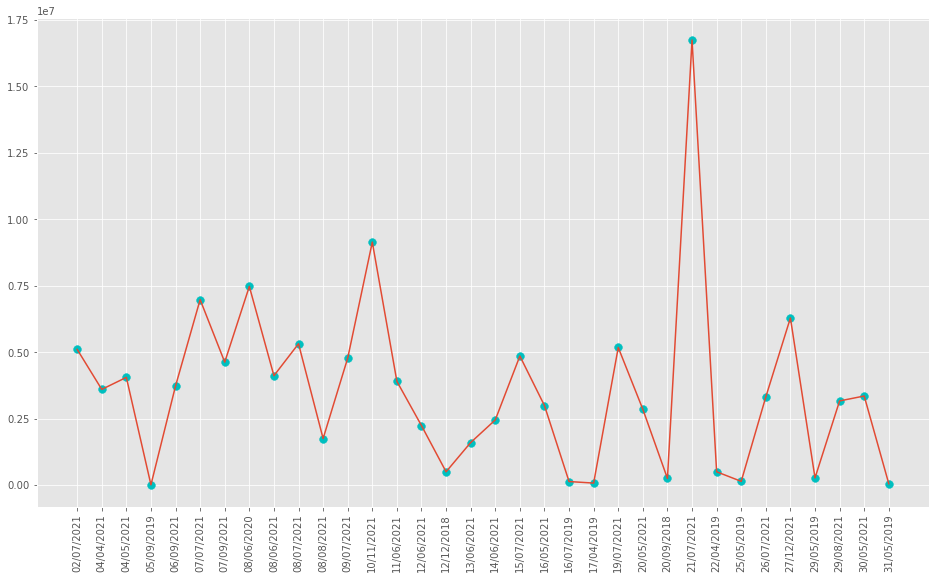

In [28]:
#Realizar un filtro
data_filtrada = data[(data["SUBGRUPO"] == 1 ) | ( data["SUBGRUPO"]== 4)]

# Ordenar el DataFrame por la columna 'Fecha'
df = data_filtrada.sort_values('Fecha')

#Filtro de datos
f1 = data_filtrada["Fecha"].values
f2 = data_filtrada["Suma de Valor transaccion"].values


# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
colores=['orange','blue']
tamanios=[30,60]

for indice, fila in data_filtrada.iterrows():
    if(fila["SUBGRUPO"]==1):
        asignar.append(colores[0])
    elif (fila["SUBGRUPO"]==4):
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[1])
plt.plot(f1, f2)
plt.xticks(rotation=90) #Rotulos de eje x
plt.show()


### Regresión Lineal con Python y SKLearn

Vamos a crear nuestros datos de entrada por el momento sólo Word Count y como etiquetas los # Shares. Creamos el objeto LinearRegression y lo hacemos “encajar” (entrenar) con el método fit(). Finalmente imprimimos los coeficientes y puntajes obtenidos.

In [29]:
dataX =data_filtrada[["Suma de Valor transaccion"]]

print(dataX)
X_train = np.array(dataX)
y_train = data_filtrada["Suma de Valor transaccion"].values

# Creamos el objeto de Regresión Linear
regresion = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regresion.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regresion.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regresion.coef_)

# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regresion.intercept_)

# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))

# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_Dosmil = regresion.predict([[2000]])
print(int(y_Dosmil))

      Suma de Valor transaccion
823                     5103550
734                     3599000
764                     4050000
252                       10000
889                     3728000
828                     6974890
890                     4624273
434                     7470000
799                     4113192
829                     5315000
860                     1750000
830                     4775000
954                     9138000
802                     3900000
803                     2236000
108                      500000
804                     1600000
805                     2450000
836                     4853172
776                     2990000
223                      133000
178                       75000
840                     5175000
780                     2850000
62                       250000
842                    16737000
183                      500000
197                      140000
847                     3316528
1001                    6286000
198     